# Neden stående kode er taget fra følgende blog: https://thebrickinthesky.wordpress.com/2013/08/17/maths-with-python-3-diffusion-equation/

# I denne blog løses 2d varmelednings ligningen på en smart måde hvor hele matricen bliver løst for hvert tidsskridt. Dette gør at vi skal lave meget færrer udregninger. 

# Der bliver placeret 20 tilfældige kolde og varme pletter i vores 2d grid og derefter bliver de udviklet i tid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
#delta t
dt = 0.002
#steds skridt
k = 1

#grid størrelser for sted
nx = 120
ny = 120
#grid størrelse for tids skridt
nt = 50000
#Tom matrice til at holde løsninger

p = np.zeros([nx,ny,nt])
#Here we set the boundary conditions for t (can be call initial conditions). It is going to be 20 hot or cold points in random positions.
for f in range(20):
    p[round((nx-1)*random.uniform(0, 1)),round((ny-1)*random.uniform(0, 1)),0] = np.sign(random.uniform(0, 1)-0.51);
    
for m in range(1,nt):
    if m % 10000 == 0:
        print m, "ud af 50.000"
#A simple implementation (but not quite eficient) will be iterating each point at a time. Because we have a matrix, we can operate with whole sections of the matrix at each time.
#Basically, we take time slices and operate them as a whole. To use centered differences, we simply shift the matrix one element in the x direction or in the y direction.
    p[1:nx-1,1:ny-1,m]=p[1:nx-1,1:ny-1,m-1]+dt*k*((p[2:nx,1:ny-1,m-1]-2*p[1:nx-1,1:ny-1,m-1]+p[0:nx-2,1:ny-1,m-1])/np.power(k,2)+(p[1:nx-1,2:ny,m-1]-2*p[1:nx-1,1:ny-1,m-1]+p[1:nx-1,0:ny-2,m-1])/np.power(k,2))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10000 ud af 50.000
20000 ud af 50.000
30000 ud af 50.000
40000 ud af 50.000


# Nedenunder ses løsningen af varmelednings ligningen tidsudviklet i 2 dimensioner.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


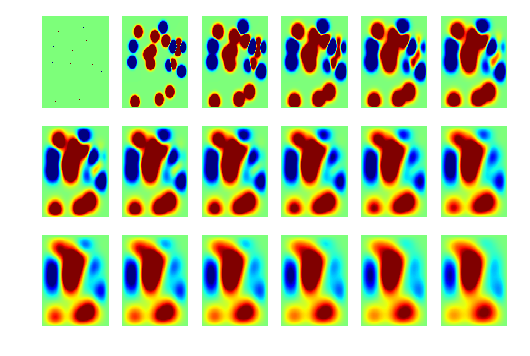

In [2]:
#Finally we plot several iterations
fig = plt.figure()
for g in range(18):
    plt.subplot(3,6,g+1)
    plt.axis([0,nx,0,ny])
    plt.pcolor(p[:,:,round(g*(nt-1)/17)],vmin=-0.001,vmax=0.001,cmap='jet')
    plt.axis('off')

plt.show()